### 케라스 심층 신경망 만들기 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout # new!
from tensorflow.keras.layers import BatchNormalization # new!
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
# Load MNIST dataset 
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

## Preprocess the data
# Reshape the data to fit the model
X_train = X_train.reshape((60000, 784)).astype('float32') / 255 
X_valid = X_valid.reshape((10000, 784)).astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)

In [3]:
# 신경망 만들기 
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(BatchNormalization()) # 이전 층의 활성화 a에 대한 배치 정규화 변환
model.add(Dense(64, activation='relu')) 
model.add(BatchNormalization()) 
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu')) 
model.add(BatchNormalization()) 
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

/Users/yb_choi/Downloads/yes/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-15 22:12:07.921054: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-06-15 22:12:07.921074: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-15 22:12:07.921081: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-06-15 22:12:07.921100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-15 22:12:07.921111: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,978 (234.29 KB)

 Trainable params: 59,594 (232.79 KB)

 Non-trainable params: 384 (1.50 KB)

In [5]:
# Compile the model
model.compile(optimizer= 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Epoch 1/20


2025-06-15 22:13:36.330198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.6603 - loss: 1.0702 - val_accuracy: 0.9026 - val_loss: 0.3431
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8536 - loss: 0.4929 - val_accuracy: 0.9123 - val_loss: 0.3134
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8627 - loss: 0.4774 - val_accuracy: 0.9083 - val_loss: 0.3216
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8610 - loss: 0.4734 - val_accuracy: 0.9079 - val_loss: 0.3217
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8627 - loss: 0.4675 - val_accuracy: 0.9119 - val_loss: 0.3135
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8635 - loss: 0.4696 - val_accuracy: 0.9105 - val_loss: 0.3147
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8615 - loss: 0.4751 - val_accuracy: 0.9105 - val_loss: 0.3142
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8633 - loss: 0.4748 - val_accuracy: 0.91

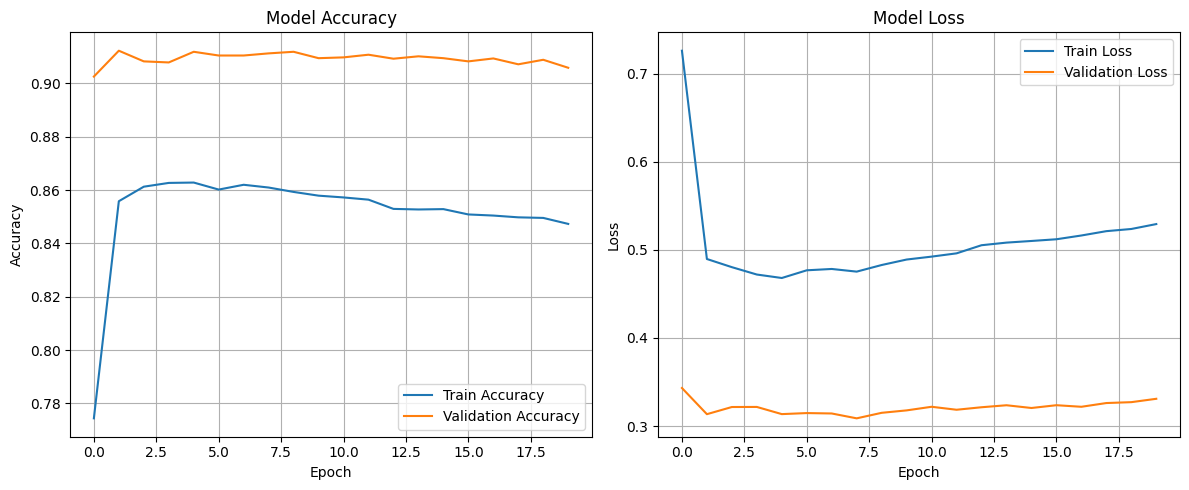

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()